# NHS ACUTE TRUST DAILY NUMBER OF PEADIATRIC EMERGENCY ATTENDANCES NEXT 28 DAYS FORECAST REPORT


&copy; HPDM097: 710053015: 2022


## Problem Statement

The National Health Services (NHS) Peadiatric Emergency department recieves fluctuating number of patients daily throughout the year. To aids in planning to ensure optimum number of resource staff are allocated at this department, the NHS needed a forecasting model that could accurately predict the number of patients at the department in the next 28 days.

# Executive summary
While doing this forecasting project, my main goal was to recommend a suitable forecasting method for an NHS acute trust and provide a twenty-eight days forecast of the daily number of pediatric emergency attendance. After a careful evaluation and comparison of the suitable method with a naive benchmark on a twenty-eight days forecast result, using the root mean square error score(RMSE) score of these methods on test data, I decide which method is the best for the NHS Trust to forecast a daily number of pediatric emergency attendances at the hospital. The least RMSE value shows which method would be useful at most for their data to support them with planning their staffing decision to sufficiently handle pediatric emergency attendances. which was “Prophet” as it produced the lowest error score.

# Introduction.
In this forecast project I will implement, cross validate, and test Prophet forecasting method, and compare it with a NAIVE1 benchmark forecasting method on a twenty-eight days forecast horizon using their root mean square error(RMSE), scoring on the test dataset.
### Aims and Objectives.
* To produce a twenty-eight days forecast on a daily peadiatric attendances at a hospital emergency department.
* To evaluate and compare between Prophet and the NAIVE1 benchmark which one would be best  for this task.
* To recommend a forecasting method for a NHS Acute Trust for forecasting peadiatric emergency attendances at the hospital.

### The Data
A Time Series Data set with "date" and "paed_ed_attends" columns containing 1056 observation of daily peadiatric attendance at a NHS acute trust collected from April 2014 to February 2017 was provided for this practical.







# Planed Analyses and Methods


## 1.   Loading time series data into the colab notebook.
The dataset for this project is hosted on a github repositoey and it was accessed through its url uisng pandas to download it into google-colab while setting the frequency of the data in the datafram to 'D' as these were data collected on a daily frequency.



In [ ]:
#@title Imports (RUN ME!) { display-mode: "form" }
# installing package forecast_tools for the forecasting process.
#!pip install forecast_tools
# installing prophet
#!pip install prophet
# importing pandas library for downloading and analyzing the dataset
import pandas as pd
# importing numpy for performing numeric calculations and working with arrays and or series.
import numpy as np
# importing adfuller to perfom dicky fuller test for stationarity
from statsmodels.tsa.stattools import adfuller
from numpy.core.shape_base import block
from pandas.core.algorithms import diff
# Importing performance metrics measures
from forecast_tools.metrics import forecast_errors
# Importing all the baseline bench models
from forecast_tools.baseline import baseline_estimators
# Importing Naive1 from the baseline estimators
from forecast_tools.baseline import Naive1, SNaive
# importing matplotlib to help with the plotting and creating graphs
import matplotlib.pyplot as plt
# importing statmodels api for accessing some functions and model inside the stats model
import statsmodels.api as sm
plt.style.use('ggplot')
%matplotlib inline



C:\Users\nyeko\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
file_url = 'https://raw.githubusercontent.com/N-Sam/forecast-lab/main/paediatrics_train.csv'


In [ ]:
df_timeseries = pd.read_csv(file_url, parse_dates= True, index_col='date')
df_timeseries.index.freq = 'D'

## 2.   Exploratory data analysis.
Exploratory data analysis was performed on the data set to get a clear understanding of the dataset and assess for the existence of missing values or invalid data format, assess for trend, seasonality and auto-correllaion in the series and to make the series stationary before using it for the forecast.

### Preliminary Analyses.



In [ ]:
# getting to know the number of rows and columns in the dataset
df_timeseries.shape

(1056, 1)

In [ ]:
# getting to know the total different column in the dataframe and their data type.
df_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1056 entries, 2014-04-01 to 2017-02-19
Freq: D
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   paed_ed_attends  1056 non-null   int64
dtypes: int64(1)
memory usage: 16.5 KB


In [ ]:
# viewing the index of the dataset
df_timeseries.index

DatetimeIndex(['2014-04-01', '2014-04-02', '2014-04-03', '2014-04-04',
               '2014-04-05', '2014-04-06', '2014-04-07', '2014-04-08',
               '2014-04-09', '2014-04-10',
               ...
               '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
               '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
               '2017-02-18', '2017-02-19'],
              dtype='datetime64[ns]', name='date', length=1056, freq='D')

In [ ]:
# checking if there is any null value in the data frame
df_timeseries.isnull().any()

paed_ed_attends    False
dtype: bool

In [ ]:
# getting the minimum starting index of the data frame
df_timeseries.index.min()

Timestamp('2014-04-01 00:00:00', freq='D')

In [ ]:
# getting the maximum index of the data frame
df_timeseries.index.max()

Timestamp('2017-02-19 00:00:00', freq='D')

In [ ]:
# viewing the first five rows of the data frame
df_timeseries.head()

,paed_ed_attends
date,
2014-04-01,47
2014-04-02,46
2014-04-03,47
2014-04-04,48
2014-04-05,52


<AxesSubplot:xlabel='date'>

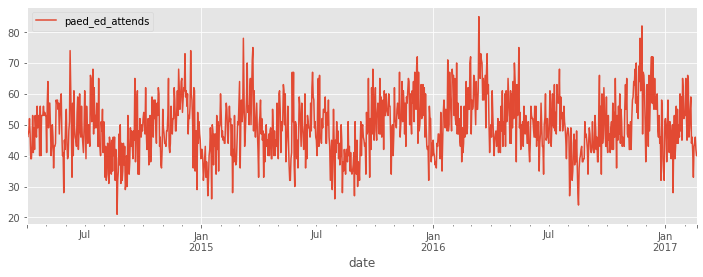

In [ ]:
df_timeseries.plot(figsize=(12,4))

From the above plot, we can notice that time-series has some-kind of additive effect which seems to be increasing with time-period. We can see that there is a slight trend and strong seasonality effects which is amplifying over time.

Below I also plotted auto-correlation plot for time-series data as well. This plot was meant to helped understand whether present values of time-series were positively correlated, negatively correlated or not related at all with past values. statsmodels library provided a ready to use method plot_acf for this.




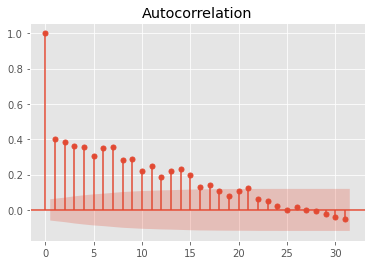

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(df_timeseries);

I notice from the above chart that after 15 lags, the line gets inside confidence interval (the pink shaded area). This can be due to auto correlation and seasonality in the time series.

Using the utility function seasonal_decompose in the Python statsmodel module the time-series was decomposed to see various components of trends, seasonality and residuals in the time-series visually.

In [ ]:
# importing seasonal_decompose from statsmodels to decompose the series
from statsmodels.tsa.seasonal import seasonal_decompose


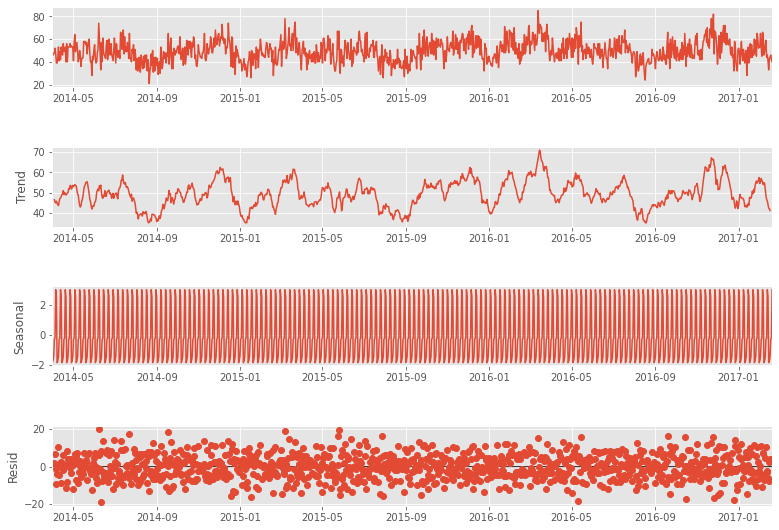

In [ ]:
decompose_result = seasonal_decompose(df_timeseries, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

fig = decompose_result.plot();
fig.set_size_inches(12,8)

We can notice trend and seasonality components separately as well as residual components.

some helper functions were defined below in a colapsible cell to reduced the length of the notebook. it can be viewed by clicking view code link on the cell.

In [ ]:
#@title Helper Functions (RUN ME!, VIEW ME!) { display-mode: "form" }

# A function to split the time series into training and testsets

def split_time_series(df, test_size):
	"""
	This function split the time series datafarme into
    a training and test set to be used
	later in validation

	Params:
    -df (dataframe)
		-test_size (float in percentage)

	Outputs:
		-training_df
		-test_df
	"""
	train_percent = len(df)/ len(df) - test_size
	train_len = int(train_percent * len(df))
	train_df = df[:train_len]
	test_df = df[train_len:]

	return train_df, test_df

# A helper function for ploting naive predictions
def plot_naive_prediction(df, pred):
	"""
	This function helps in plotting naive prediction
	by converting the predicted values into a pandas dataframe.

	Params:
		-df (training dataset)
		-pred (predictions)

	"""
	start = pd.date_range(start=df.index.max(), periods=2, freq='D').max()
	index = pd.date_range(start=start, periods=len(pred), freq=df.index.freq)

	return pd.DataFrame(pred, index=index)

# A function to generate a first degree differenced series
def diference_ts(timeseries):
    ts_diff = timeseries - timeseries.shift()
    ax1 = plt.subplot(121)
    ts_diff.plot(figsize=(8,4), color="tab:red", title="Passed series & Differenced Time-Series", ax=ax1);
    ax2 = plt.subplot(122)
    df_timeseries.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
    return ts_diff
# invert differenced forecast

#Funtion for testing stationarity
def test_stationarity(timeseries, window=12):
    movingAv = timeseries.rolling(window=window).mean()
    movingSTD = timeseries.rolling(window=window).std()
    # plotting the rolling meanand std
    originalseries = plt.plot(timeseries, color="blue", label="Passed series series")
    mean = plt.plot(movingAv, color="red", label="Moving Average")
    std = plt.plot(movingSTD, color="green", label="Moving Standard deviation")
    plt.legend(loc="best")
    plt.title("Rolling Mean And Standard deviation")
    plt.show(block=False)
    print()
    print('performing dicky-fuller test')

    dftest = adfuller(timeseries['paed_ed_attends'].dropna().values, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'P-Value', 'Num Lag used', 'Number of observation used'])

    for key, val in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = val
    print(dfoutput)

# A rolling forecast function
def rolling_forecast_origin(train, min_train_size, horizon):
    '''
    Rolling forecast origin generator function.

    Params:
        -train (dataframe used to fit the model).
        -min_train_size (minimum size required to train the model).
        -horizon (the prediction interval to be produced).
    Outputs:
        -train df
        -test df
    '''
    for i in range(len(train) - min_train_size - horizon + 1):
        split_train = train[:min_train_size+i]
        split_test = train[min_train_size+i:min_train_size+i+horizon]
        yield split_train, split_test

# A function to cross validate our model
def cross_validate(model, cv, scores=[], horizon=28):
    from forecast_tools.metrics import root_mean_squared_error
    """
    This Function perform cross validation on a model.

    Params:
        -model (object)
    Output:
        -mean cross validation error score
    """

    for train_fold, test_fold in cv:
        # this could be any model
        #print(F'Train Fold {train_fold}')
        #print(F'Test Fold {test_fold}')
        model.fit(train_fold)
        preds = model.predict(horizon)

        # this could be any error measure
        score = root_mean_squared_error(test_fold, preds)
        scores.append(score)
        #print(F'Score: {score}')
        #print(preds)

    print(np.array(scores).mean())
# A function to make prophet dataframe

def make_prophet_data(y_train):
    '''
    This function converts a timeseries series or
    a timeseries dataframe into a prophet format for modeling.
    Parameters:
    ---------
    df_train: pandas dataframe or series with datetime index with only
        the target variable as column.

    outputs:
    --------
        pd.DataFrame in Prophet format
        with additional column ds added.
    '''
    prophet_df = pd.DataFrame(y_train.index)
    prophet_df['y'] = y_train.to_numpy()
    prophet_df.columns = ['ds', 'y']
    return prophet_df

# A function to create prophet future dataframe
def make_future_df(df_train, df_test, horizon):
    '''
    This function creates a test dataset from the training and test
    timeseries dataframe into a prophet future dataframe for testing.
    Parameters:
         -df_train (training dataframe)
         -df_test (holdout test data)
         -horizon (prediction period)
    ---------
    df_train: pandas dataframe or series with datetime as only
        the only column.

    outputs:
    --------
        pd.DataFrame in Prophet format future df.

    '''
    values = df_train.index.to_list()[0:] + df_test.index.to_list()[0:28]
    p_f_df = pd.DataFrame(values)
    p_f_df.columns = ['ds']

    return p_f_df

# Function for measuring prophet pointforecast error
def calculate_prophet_error(df, forecast):
    err = {}
    """
    This function calculates prophet point forecast error.

    Params:
        - df (prophet predictions)
        - forecast (prophet forecast)

    Output:
        -prediction errors
    """
    y_true = df['paed_ed_attends'][0:28].values
    y_pred = forecast['yhat'][835:863].values
    matrics = forecast_errors(y_true, y_pred)
    # err['mae'] = mean_absolute_error(y_true, y_pred)
    # err['rmse'] = root_mean_squared_error(y_true, y_pred)
    # err['smape'] = symmetric_mean_absolute_percentage_error(y_true, y_pred)


    for key, val in matrics.items():
         print(f'{key}: {val}')

#A helper function to recover original dataframe
def recover_original(ts_diff, detrended_df, timeseries):
    """
    This functions recover the original dataframe from
    the detrended dataframe and differenced dataframe

    Params:
        -ts_diff(differenced series)
        -ori_df(original timeseries)
    """
    rolling_mean = timeseries.rolling(window = 12).mean()
    ts_diff = ts_diff.dropna()
    detrended_df = detrended_df.dropna()
    detrended_df = detrended_df + ts_diff
    rolling_mean = rolling_mean.dropna()
    ori_df = detrended_df + rolling_mean

    return ori_df

# A helper function for ploting prediction interval
def plot_prediction_intervals(train, preds, intervals, test=None):
    '''
    Helper function to plot training data, point preds
    and 3 sets of prediction intevals with 3 sets of prediction interval

    Params:
        -train (the dataframe used in fitting the model)
        -pred, (the predicted values of the model)
        -intervals theprediction intervals returned.
    Output:
        -plot of the predicted values with their respective
        predictions intervals.
    '''
    ax = train.plot(figsize=(12,4))

    mean = plot_naive_prediction(train, preds)
    intervals_80 = plot_naive_prediction(train, intervals[0])
    intervals_90 = plot_naive_prediction(train, intervals[1])
    intervals_95 = plot_naive_prediction(train, intervals[2])

    mean.plot(ax=ax, label='point forecast')

    ax.fill_between(intervals_80.index, mean[0], intervals_80[1],
                    alpha=0.2,
                    label='80% PI', color='yellow');

    ax.fill_between(intervals_80.index,mean[0], intervals_80[0],
                    alpha=0.2,
                    label='80% PI', color='yellow');

    ax.fill_between(intervals_80.index,intervals_80[1], intervals_90[1],intervals_95[1],
                    alpha=0.1,
                    label='90% PI', color='green');

    ax.fill_between(intervals_80.index,intervals_80[0], intervals_90[0], intervals_95[0],
                    alpha=0.1,
                    label='90% PI', color='green');

    ax.fill_between(intervals_80.index,intervals_80[1], intervals_90[1],  intervals_95[1],
                    alpha=0.05,
                    label='95% PI', color='white');

    ax.fill_between(intervals_80.index,intervals_80[0], intervals_90[0],  intervals_95[0],
                    alpha=0.05,
                    label='95% PI', color='white');


    ax.legend(['train', 'point forecast', '80%PI', '90%PI', '95%PI'], loc=2)


### Checking Whether Time-Series is Stationary or Not
A check was done to determine whether the mean, variance and auto-covariance are independent of time. these components, mean, variance and auto-covariance were checked using moving window functions available with pandas. Dicky-fuller test available with statsmodels was also used to check the stationarity of time-series, all were inplemented in a helper function called test_stationarity. If time-series was not stationary then I needed to make it stationary, beacuse the models and forecasting process require a stationary series.
Below I have taken an average over moving window of 12 samples. We noticed from the above plots that there are seasonality and some slight trend in the time-series. Different window sizes for testing purposes were tried.

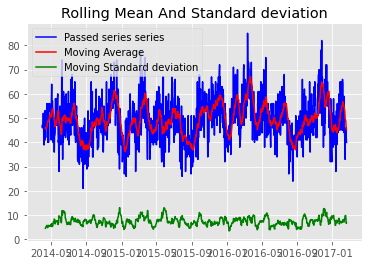


performing dicky-fuller test
Test Statistics                 -5.114570
P-Value                          0.000013
Num Lag used                    15.000000
Number of observation used    1040.000000
Critical value (1%)             -3.436653
Critical value (5%)             -2.864323
Critical value (10%)            -2.568252
dtype: float64


In [ ]:
test_stationarity(df_timeseries, 12)


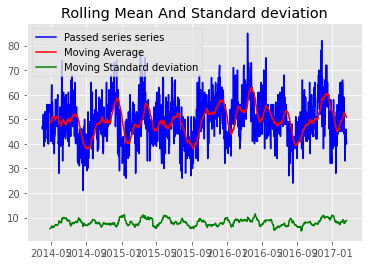


performing dicky-fuller test
Test Statistics                 -5.114570
P-Value                          0.000013
Num Lag used                    15.000000
Number of observation used    1040.000000
Critical value (1%)             -3.436653
Critical value (5%)             -2.864323
Critical value (10%)            -2.568252
dtype: float64


In [ ]:
test_stationarity(df_timeseries, 28)


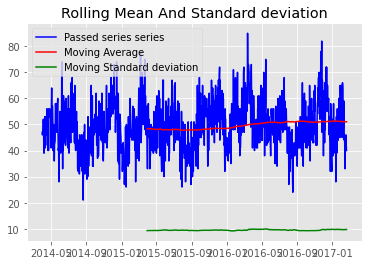


performing dicky-fuller test
Test Statistics                 -5.114570
P-Value                          0.000013
Num Lag used                    15.000000
Number of observation used    1040.000000
Critical value (1%)             -3.436653
Critical value (5%)             -2.864323
Critical value (10%)            -2.568252
dtype: float64


In [ ]:
test_stationarity(df_timeseries, 365)

from the three charts we can see that over a year, the mean and the standard deviation are fairly distributed, but there are trends and seasonality components in the monthly and in the next 28 days.

The above results were interpreted based on p-values of the result taking.
* **p-value > 0.05** - to imply that time-series is **non-stationary**.
* **p-value <=0.05** - to imply that time-series is **stationary**.

As we can see from the above results that p-value is **1.31e-05** signifficantly less than **0.05** hence our time-series is  stationary.

### Removing trend using Logged Transformation
To apply log transformation, the log of each individual value of time-series data were taken.

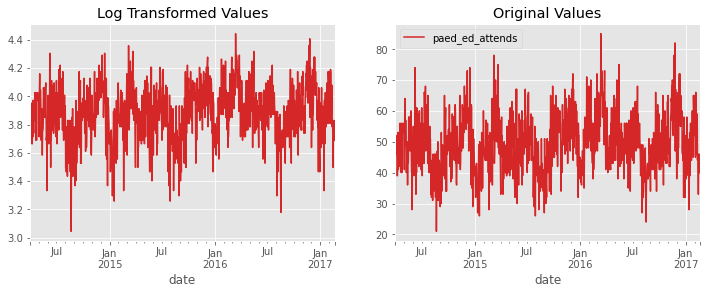

In [ ]:
logged_df = df_timeseries["paed_ed_attends"].apply(lambda x : np.log(x))

ax1 = plt.subplot(121)
logged_df.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
df_timeseries.plot(color="tab:red", title="Original Values", ax=ax2);

From the above first chart, It can be seen that there was a reduced variance of time-series data. We can look at y-values of original time-series data and log-transformed time-series data to conclude that the variance of time-series is reduced.

checking whether the transfromation was successful or not was done by checking individual components of time-series by decomposing it as shown below.

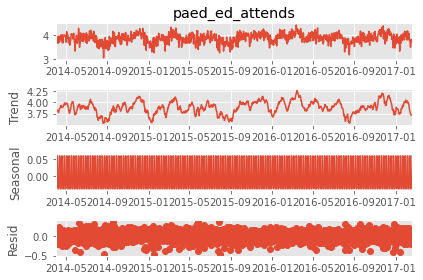

In [ ]:
decompose_result = seasonal_decompose(logged_df)

decompose_result.plot();

### Applying Power Transformations
Power transformation was applied on the 'paed_ed_attends' column by extracting the square root of the individaul values to remove trend as below.

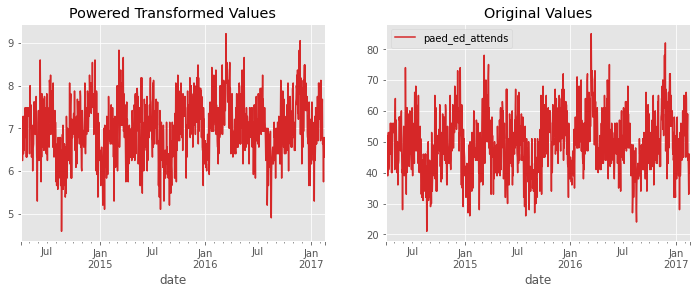

In [ ]:
powered_df = df_timeseries["paed_ed_attends"].apply(lambda x : x ** 0.5)

ax1 = plt.subplot(121)
powered_df.plot(figsize=(12,4), color="tab:red", title="Powered Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
df_timeseries.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

From the above first chart, we can see the variance of time-series data was reduced. We can look at y-values of original time-series data and power-transformed time-series data to conclude that the variance of time-series is reduced.

To check whether it was successful or not, individual components of time-series were decomposed as we had done previously.

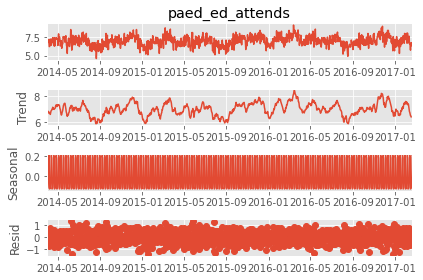

In [ ]:
decompose_result = seasonal_decompose(powered_df)

decompose_result.plot();

### Applying Moving Window Functions
Rolling mean over a period of 12 months was calculated and subtracted from original time-series to get de-trended time-series.

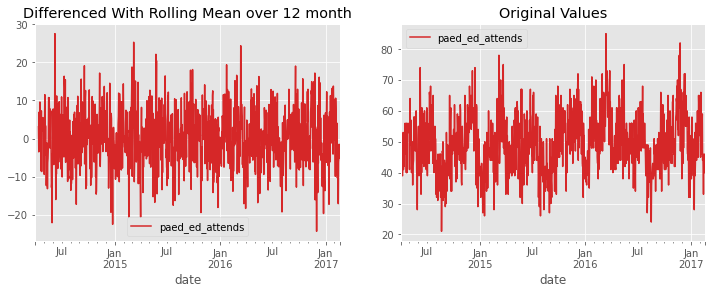

In [ ]:
rolling_mean = df_timeseries.rolling(window = 12).mean()
paed_rolled_detrended = df_timeseries - rolling_mean

ax1 = plt.subplot(121)
paed_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
df_timeseries.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

From the above the first chart, it was seen that transformation seem to have removed trend from time-series data.

checking whether it was successful or not by was done by checking individual components of time-series by decomposing it.

After applying the above transformations, we can see that moving window function seems to have done a good job in removing the trend than other methods. To confirm it further whether it actually did good, the different component of the series was removed and a check for stationarity of time-series was done using dicky-fuller test.

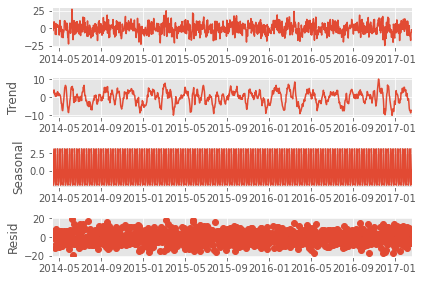

In [ ]:
decompose_result = seasonal_decompose(paed_rolled_detrended.dropna())

decompose_result.plot();

## Removing Seasonality
To remove seasonality differencing technique was used differencing over the de-trended time-series calculated above.

### Differencing Over rolled mean Transformed Time-Series
Differencing was applied to detrened transformed time-series by shifting it's value by 1 period and subtracting it from original log-transformed time-series

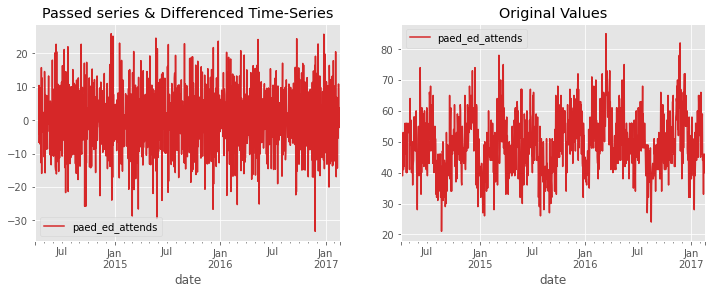

In [ ]:
ts_diff = diference_ts(paed_rolled_detrended)

From the first chart we see that the overall mean of the time series data has been reduced. Again a test was perormed to check whether our time-series is still stationary as of now by applying the dicky-fuller test which we had applied above.

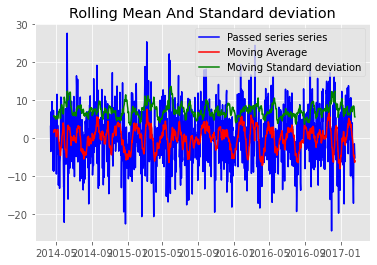


performing dicky-fuller test
Test Statistics              -7.947558e+00
P-Value                       3.189689e-12
Num Lag used                  1.300000e+01
Number of observation used    1.031000e+03
Critical value (1%)          -3.436709e+00
Critical value (5%)          -2.864347e+00
Critical value (10%)         -2.568265e+00
dtype: float64


In [ ]:
test_stationarity(paed_rolled_detrended)

From our dicky-fuller test results, we can confirm that time-series is **stationary** due to the p-value of 3.19e-12 signifficantly less than 0.05, and from the chart on the left it shows the moving average distributed between 5 and -5.

## Fitting Naive 1 Forecast As a Benchmark Model
To provide a benchamrk, Naive1 forecast from the baseline estimators was fitted , this model simply takes the last value in the time series and extrapolates it forward over the forecast horizon. as seen below from the predicted values.

**Naive Forecast = Last value in the time series**

Mathematically notated as:

$\hat{y}_{T+h|T} =y_t$ .......................................................................................(1)

To test and evaluate the model, some dataset were held back and the model was not trained on it but only provided at testing process of the model. This was done to simulate real forecasting conditions and check a models accuracy on unseen data. I didn't want the model to know what it looks like as that would have introduced bias into the forecasting process and overfiting the model to data.

In [ ]:
ts_diff = ts_diff.dropna()
ts_diff.head()

,paed_ed_attends
date,
2014-04-13,-6.583333
2014-04-14,10.416667
2014-04-15,-4.166667
2014-04-16,-2.833333
2014-04-17,9.666667


In [ ]:
df_train, df_test = split_time_series(ts_diff, 0.2)
print(len(df_train))
print(len(df_test))

835
209


In [ ]:
model_1 = Naive1()
model_1.fit(df_train['paed_ed_attends'])

The prediction interval and a 28 days predicted value were produced in a variable y_intervals and y_preds respectively.

In [ ]:
y_preds, y_intervals = model_1.predict(horizon=28, return_predict_int=True, alpha=[0.2,0.1,0.05])

In [ ]:
# Displaying the preicted next 28 days values
y_preds

array([5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25,
       5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25,
       5.25, 5.25, 5.25, 5.25, 5.25, 5.25])

In [ ]:
df_train.tail()

,paed_ed_attends
date,
2016-07-21,-7.250000
2016-07-22,2.750000
2016-07-23,-6.000000
2016-07-24,2.333333
2016-07-25,5.250000


In [ ]:
# from forecast_tools.metrics import forecast_errors

forecast_errors(df_test, y_preds)

/home/ubuntu/anaconda3/envs/hds_forecast/lib/python3.8/site-packages/forecast_tools/metrics.py:84: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


{'me': -5.275518341307814,
 'mae': 9.399920255183412,
 'mse': 130.28811137692716,
 'rmse': 11.414381778130918,
 'mape': inf,
 'smape': 139.44740726501047}

From the error scores, we can see that rmse give a more sensible error score than other measures, hence we will based our evaluation and comparison on it.

In [ ]:
df_train_ori = recover_original(df_train, paed_rolled_detrended, df_timeseries).dropna()
df_train_ori.astype(int).tail()

,paed_ed_attends
date,
2016-07-21,44
2016-07-22,56
2016-07-23,42
2016-07-24,52
2016-07-25,61


## Cross validating Naive1 forecast.

In [ ]:
train1=ts_diff['paed_ed_attends']
cv_rolling = rolling_forecast_origin(train1, min_train_size=100, horizon=28)
cross_validate(model_1, cv_rolling)

13.618276673223207


The fittted values were plotted against the differenced data as shown below to see how well it fit.

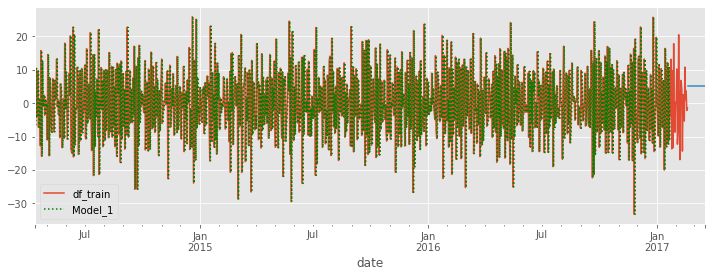

In [ ]:
ax = ts_diff.plot(figsize=(12,4))
model_1.fittedvalues.plot(ax=ax, linestyle=':', color="green")
plot_naive_prediction(ts_diff, y_preds).plot(ax=ax)
ax.legend(['df_train', 'Model_1'])

From the above plot we can see the naive1 fitted values plotted againts the original timeseries, the red portion of the plot is representing the test set that naive1 was not trained on, and the blue line is showing naive1 forecast for the next 28 dasy.

The prediction interval of the Naive1 model was plotted as seen below.

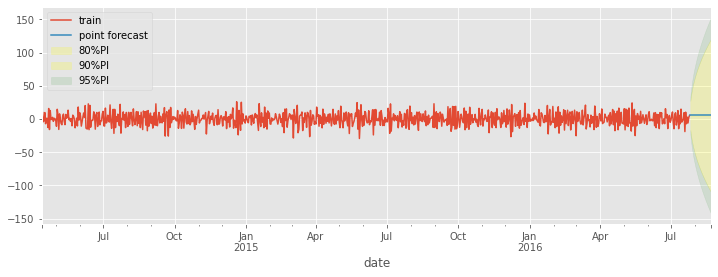

In [ ]:
plot_prediction_intervals(df_train, y_preds, y_intervals)

### Fitting Seasonal Naive

In an attempt to take care of the seasonality in the data, I fitted a seasonal Naive model to explore weekly seasonality and see if it might perform better, the point forecast, cross validation error was taken and compared with that of the naive model.

In [ ]:
snf = SNaive(period=7)
snf.fit(df_train)
sy_preds, sy_intervals = snf.predict(horizon=28, return_predict_int=True,
                                    alpha=[0.2, 0.1, 0.05])

In [ ]:
sy_preds

array([-19.        ,  10.25      ,  -7.25      ,   2.75      ,
        -6.        ,   2.33333333,   5.25      , -19.        ,
        10.25      ,  -7.25      ,   2.75      ,  -6.        ,
         2.33333333,   5.25      , -19.        ,  10.25      ,
        -7.25      ,   2.75      ,  -6.        ,   2.33333333,
         5.25      , -19.        ,  10.25      ,  -7.25      ,
         2.75      ,  -6.        ,   2.33333333,   5.25      ])

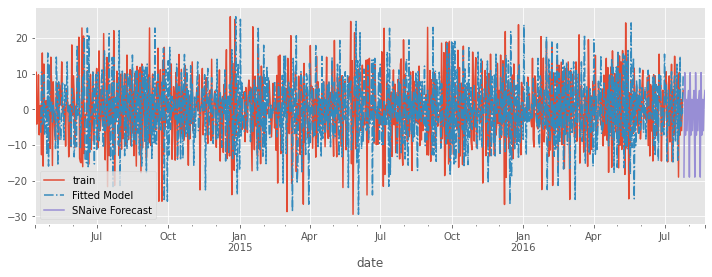

In [ ]:
ax = df_train.plot(figsize=(12,4))
snf.fittedvalues.plot(ax=ax, linestyle='-.')
plot_naive_prediction(df_train, sy_preds).plot(ax=ax)
ax.legend(['train','Fitted Model', 'SNaive Forecast'])

In [ ]:
forecast_errors(df_test, sy_preds)

/home/ubuntu/anaconda3/envs/hds_forecast/lib/python3.8/site-packages/forecast_tools/metrics.py:84: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


{'me': 1.6411483253588524,
 'mae': 10.99920255183413,
 'mse': 187.40038543328015,
 'rmse': 13.689426044698884,
 'mape': inf,
 'smape': 140.8387448388735}

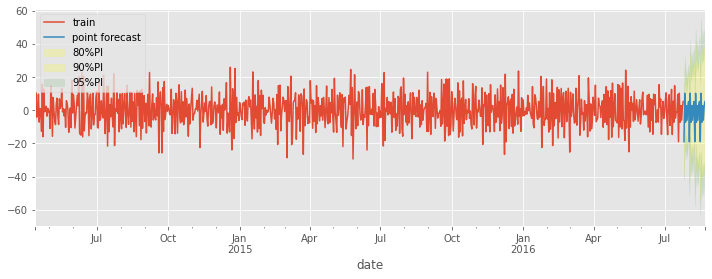

In [ ]:
plot_prediction_intervals(df_train, sy_preds, sy_intervals)

### Cross validating SNaive model.

In [ ]:
scv_rolling = rolling_forecast_origin(train1, min_train_size=100, horizon=28)
cross_validate(snf, scv_rolling)

13.554668521755556


## Fitting prophet model.

Prphet model was fitted by first creating a Prophet object as ``` model = Prophet(interval_width=0.95, daily_seasonality=False)```,using the same training dataset and tested on the same dataset with cross validation to make a fair comparison between the benchmark model and prophet method.


In [ ]:
import prophet

from prophet import Prophet
from prophet.plot import (plot_plotly, plot_components_plotly,
                          add_changepoints_to_plot)

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [ ]:
prophet_train = make_prophet_data(df_train)

In [ ]:
model_p = Prophet(interval_width=0.95, daily_seasonality=False)
model_p.fit(prophet_train)

Initial log joint probability = -55.3331


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       511.347   2.41836e-07       91.4268      0.2776           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       511.347   5.31309e-09        96.307      0.3337      0.3337      138   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


**Testing Prophet model**,
To test the prophet model on our test data set held out, the future data set for making prediction was made from the training and test data set. to confirm that there was no variation, a check was mad against the builtin prophet method ```make_future_dataframe(periods=28)``` and he same data frame for evaluation was produced.

In [ ]:
p_f_df = make_future_df(df_train, df_test, 28)
p_f_df

,ds
0,2014-04-13
1,2014-04-14
2,2014-04-15
3,2014-04-16
4,2014-04-17
...,...
858,2016-08-18
859,2016-08-19
860,2016-08-20
861,2016-08-21


In [ ]:
future = model_p.make_future_dataframe(periods=28)
future

,ds
0,2014-04-13
1,2014-04-14
2,2014-04-15
3,2014-04-16
4,2014-04-17
...,...
858,2016-08-18
859,2016-08-19
860,2016-08-20
861,2016-08-21


In [ ]:
prophet_forecast = model_p.predict(p_f_df)
prophet_forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
858,2016-08-18,0.142120,-19.007262,18.975753,0.142052,0.142187,0.650002,0.650002,0.650002,0.476195,0.476195,0.476195,0.173808,0.173808,0.173808,0.0,0.0,0.0,0.792122
859,2016-08-19,0.142429,-16.904982,20.495302,0.142359,0.142501,1.404169,1.404169,1.404169,1.236801,1.236801,1.236801,0.167367,0.167367,0.167367,0.0,0.0,0.0,1.546598
860,2016-08-20,0.142739,-18.467244,20.562967,0.142665,0.142815,0.799609,0.799609,0.799609,0.638257,0.638257,0.638257,0.161352,0.161352,0.161352,0.0,0.0,0.0,0.942348
861,2016-08-21,0.143049,-16.842757,23.754646,0.142970,0.143128,3.281748,3.281748,3.281748,3.125697,3.125697,3.125697,0.156051,0.156051,0.156051,0.0,0.0,0.0,3.424796
862,2016-08-22,0.143358,-18.856539,16.017508,0.143274,0.143441,-1.198332,-1.198332,-1.198332,-1.350038,-1.350038,-1.350038,0.151706,0.151706,0.151706,0.0,0.0,0.0,-1.054973


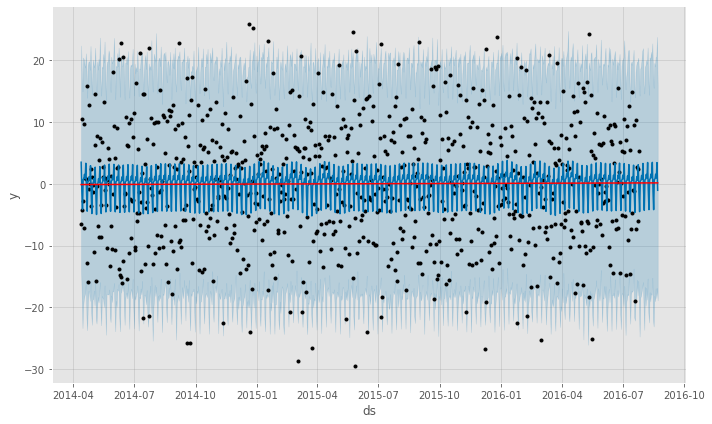

In [ ]:
fig = model_p.plot(prophet_forecast);

a = add_changepoints_to_plot(fig.gca(), model_p, prophet_forecast);

Measuring Prophet point forecast errors.

In [ ]:
calculate_prophet_error(df_test, prophet_forecast)

me: -0.08736461727925873
mae: 5.962703047165896
mse: 57.67478722844032
rmse: 7.5943918274237285
mape: 144.62693988041093
smape: 147.0330605955989


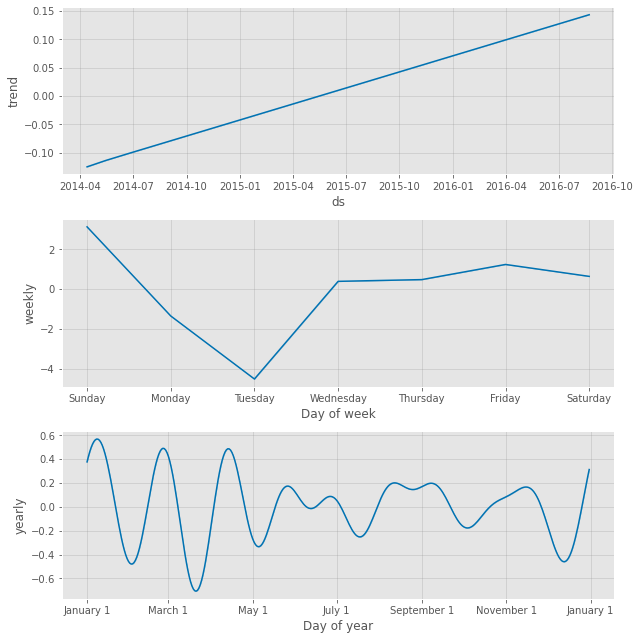

In [ ]:
model_p.plot_components(prophet_forecast);

From the decomposed prophet model components, we can see clearly that trend in the data set is rising steeply each day, and on a weekly basis there is alwas a deep on Tuesday, over the year, the seasonality flattens from May to early December which rises again on January.

### Cross validating Prophet model
To cross validate the prophet model, I used the cross validation procedures provided in the diagnostics module of the prophet package. I immported it as ``` from prophet.diagnostics import cross_validation, performance_metrics``` together with the performance metrics, passing in the following parameters, initial initial training length, period, and horizon in time delta.

In [ ]:
len(ts_diff)

1044

In [ ]:
df_cv = cross_validation(model_p, initial=F'{str(3*28)} days', period='28 days', horizon='28 days')

INFO:prophet:Making 26 forecasts with cutoffs between 2014-07-28 00:00:00 and 2016-06-27 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

Initial log joint probability = -14.1648
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       36.8663    7.6779e-09       101.084      0.3789           1      126   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -22.8336
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65       48.3639   4.90397e-06       100.975    4.86e-08       0.001      122  LS failed, Hessian reset 
      87       48.3642   8.32549e-09       99.4038      0.5334      0.5334      149   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -15.6559
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      76       76.8592   8.27228e-09       100.235      0.3622      0.3622      102   
Optimization termin

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-07-29,-3.304975,-24.404518,15.450410,6.500000,2014-07-28
1,2014-07-30,-0.962852,-19.908424,17.540469,-13.000000,2014-07-28
2,2014-07-31,0.702830,-18.026444,19.121641,9.833333,2014-07-28
3,2014-08-01,0.228410,-18.495642,19.792798,-4.083333,2014-07-28
4,2014-08-02,0.781026,-18.162021,19.737696,-11.166667,2014-07-28


In [ ]:
df_p = performance_metrics(df_cv, rolling_window=1)
df_p

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,28 days,115.815522,10.761762,8.808689,1.047357,1.540883,0.931319


/home/ubuntu/anaconda3/envs/hds_forecast/lib/python3.8/site-packages/prophet/plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/home/ubuntu/anaconda3/envs/hds_forecast/lib/python3.8/site-packages/prophet/plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


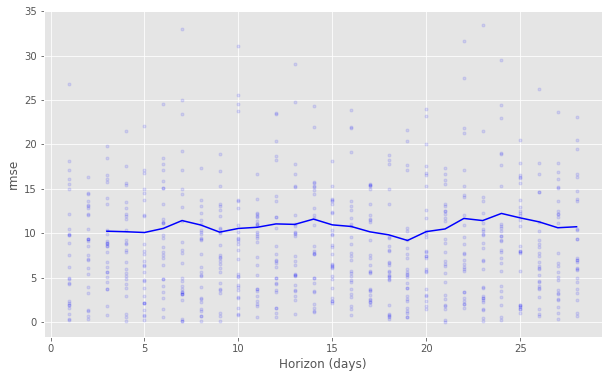

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='rmse', rolling_window=0.1)

## Fitting RNN model using our data

**We need to Reshape our Data**

We now need to reshape our data. In RNNs, we use a previous number of time stamps to predict the next values. For this example, we will use the previous 28 days of closing prices to predict the next day's closing price. To do this, we need to save the previous 28 days' worth of stock prices for our feature set.

We also need the data to be 3-dimensional in order to pass it through an RNN layer (we will use an LSTM layer for this example). The first dimension is the number of rows, the second is the number of time steps (days) we are using to predict the next day's price, and the third is the number of features. For this example, our dimension will be (835, 28, 1). Since our training sequences have 835 values, we are using the past 28 days to predict the next day, and we are only using the closing price.

We are going to be using the [TimeseriesGenerator ](https://keras.io/api/data_loading/timeseries/)in Keras to get the data in the format we need for an RNN. The following code accomplishes this. Alternatively, you could do this by hand. You can view an example of this technique [here](https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/).

# Results
As seen from the above-predicted output of the Naive1 forecast, it has predicted that the number of pediatrics emergency attendance for the next 28 days would be constant at 5.25 an equivalent of 61 according to the training data if converted back to an original state, with an estimated point forecast error of mean absolute error(MAE) = 9.40, root mean square error(RMSE) = 11.41, and symmetric mean absolute percentage error (SMAPE) = 139.45, cross-validation average root mean square error(RMSE)=13.62. Seasonal Naive forecast cored point forecast errors of mean absolute error(MEA) = 10.10, root mean square error(RMSE) = 13.69, symmetric mean absolute percentage error(SMAPE) = 140.84, and an average root mean square error(RMSE)=13.55 during cross-validation. Prophet models scored point forecast errors of mean absolute error(MEA) = 5.96, root mean square error(RMSE) = 7.59, symmetric mean absolute percentage error(SMAPE) = 147.03, and an average of 10.76 root mean square error(RMSE) with cross validation respectively.


Checking other baseline estimators with a cross validation score to establish if there is one that may be better than prophet in terms of the cross validate root mean square error(RMSE).

In [ ]:
# from forecast_tools.baseline import baseline_estimators
estimators = baseline_estimators(seasonal_period=12)
estimators

{'NF1': Naive1(),
 'SNaive': SNaive1(period=12),
 'Average': Average(),
 'Drift': Drift(),
 'Ensemble': EnsembleNaive(seasonal_period=12)}

In [ ]:
min_train_size = 200

results = {}
combined_scores = []
for name, model in estimators.items():
    cv = rolling_forecast_origin(train1,
                                 min_train_size=min_train_size,
                                 horizon=28)
    scores = cross_validate(model, cv)
    results[name] = scores
    combined_scores.append(scores)

results

13.570269375459477
13.678356863518225
12.95630650927927
13.086683980447223
12.860261026467784


{'NF1': None, 'SNaive': None, 'Average': None, 'Drift': None, 'Ensemble': None}

# Discussion And Conclusion
From the results obtained above from the three methods, Naive1, SNaive, and Prophet, SNaive produced the highest point forecast error concerning mean absolute error(MAE), root mean square error((RMSE), its symmetric mean absolute percentage error(SMAPE) was also higher than that of Naive1 model but prophet model. This means overall it had the lowest accuracy in its predicted values than the other two methods, followed by Naive1 forecast method as its error scores were second-highest among the three methods. Prophet scored the least error scores except for its symmetric mean absolute percentage error, this implies prophet had a higher level of accuracy in forecasting the future number of pediatrics attendance for the next twenty-eight days, Although its symmetric mean absolute percentage error was high, this could be due to the nature of the data that may not easily be evaluated using relative methods. Prophets give a clear breakdown of its diagnostics and decomposed components which revealed clearly that on a weekly scale there is always a dip every Tuesday, on a daily scale there is an increasing number of patients as depicted by the upward trend. To predict the future prophet makes a simulated future data, Snaive recalls a previous particular day of the week number and uses it to predict the next value on that particular weekday of the following week and so on for monthly data, which is not true in reality. The naive1 method carries the last value in the time series throughout the horizon to forecast the future which is so erroneous in reality. So for this time-series data set, I strongly recommend the prophet forecasting method as it produced the least error score both at cross-validation and for point forecast error, more so its algorithm is additive regression with four components of linear or logistic regression and can detect trends automatically in data by changing data points.


